Ссылка на датасет для курсового проекта: https://www.kaggle.com/gregorut/videogamesales

Расчитать основные статистические показатели по жанрам, годам выпуска, производителю.

Проверить, работает ли нормальное распределение и Парето.

Проверить есть ли зависимость продаж по регионам и глобальных от года выпуска, производителя, жанров.

Проверить гипотезу: 
- игры от японских производителей лучше продаются в Японии, чем другие; 
- Игры в жанре action более популярны, чем спортивные.

## Ознакомление с набором данных

In [1]:
import numpy as np
import pandas as pd

DATA_PATH = 'vgsales.csv'

df = pd.read_csv(DATA_PATH, index_col='Rank')
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


In [3]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [4]:
df.describe(include='object')

,Name,Platform,Genre,Publisher
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


## Работа с выбросами

In [5]:
df.isna().sum()[df.isna().sum() != 0]

Year         271
Publisher     58
dtype: int64

In [6]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16291 non-null  object 
 1   Platform      16291 non-null  object 
 2   Year          16291 non-null  float64
 3   Genre         16291 non-null  object 
 4   Publisher     16291 non-null  object 
 5   NA_Sales      16291 non-null  float64
 6   EU_Sales      16291 non-null  float64
 7   JP_Sales      16291 non-null  float64
 8   Other_Sales   16291 non-null  float64
 9   Global_Sales  16291 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


## Расчет основных статистических показателей

In [7]:
count = df['Genre'].value_counts()
df_genre = df.groupby('Genre').sum()
df_genre = pd.concat([df_genre,count], axis=1)
df_genre.drop('Year', axis=1, inplace=True)
df_genre.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Genre
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,360.637500,200.557500,107.022500,65.742500,734.330833,1357.583333
std,245.665205,143.297383,86.158702,52.817908,471.983320,768.065629
min,67.830000,44.840000,38.180000,11.230000,173.270000,570.000000
25%,166.837500,90.935000,55.455000,27.695000,353.037500,845.000000
50%,341.715000,194.110000,75.345000,55.445000,758.315000,1249.500000
75%,478.282500,254.845000,131.677500,82.985000,949.422500,1524.000000
max,861.770000,516.480000,350.290000,184.920000,1722.840000,3251.000000


Основные статистические показатели по жанрам: $\sigma_{NA}=245.665205, \sigma_{EU}= 143.29738, \sigma_{JP}=86.158702, \sigma_{other}=52.817908, \sigma_{global}=471.98332, \sigma_c=768.065629, M(X)_{NA}=360.6375, M(X)_{EU}=200.5575, M(X)_{JP}=107.0225, M(X)_{other}=65.745 ,M(X)_{gs}=734.330833, M(X)_c=1367.58(3)$

In [8]:
count = df['Year'].value_counts()
df_years = df.groupby('Year').sum()
df_years = pd.concat([df_years,count], axis=1)
df_years.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,110.965385,61.710000,32.930000,20.228462,225.947949,417.717949
std,107.664841,63.682584,21.225966,25.061647,212.111224,450.905344
min,0.000000,0.000000,0.000000,0.000000,0.050000,1.000000
25%,24.345000,4.300000,14.670000,0.905000,46.600000,19.000000
50%,86.760000,47.260000,34.200000,7.750000,199.150000,289.000000
75%,183.785000,114.250000,50.890000,38.820000,365.800000,699.500000
max,351.440000,191.590000,73.730000,82.390000,678.900000,1431.000000


Основные статистические показатели по году: $\sigma_{NA}=107.664841, \sigma_{EU}= 63.682584, \sigma_{JP}=21.225966, \sigma_{other}=25.061647, \sigma_{global}=212.111224, \sigma_c=450.905344, M(X)_{NA}=110.965385, M(X)_{EU}=61.71, M(X)_{JP}=31.93, M(X)_{other}=20.228462 ,M(X)_{gs}=225.947949, M(X)_c=417.717949$

In [9]:
count = df['Publisher'].value_counts()
df_pub = df.groupby('Publisher').sum()
df_pub = pd.concat([df_pub,count], axis=1)
df_pub.drop('Year', axis=1, inplace=True)
df_pub.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Publisher
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,7.513281,4.178281,2.229635,1.369635,15.298559,28.282986
std,50.659919,28.298167,20.827933,8.983380,102.865446,115.417374
min,0.000000,0.000000,0.000000,0.000000,0.010000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.070000,1.000000
50%,0.090000,0.040000,0.010000,0.010000,0.320000,3.000000
75%,0.750000,0.292500,0.172500,0.092500,1.632500,10.000000
max,815.750000,418.300000,454.990000,127.630000,1784.430000,1339.000000


Основные статистические показатели по производителю: $\sigma_{NA}=50.659919, \sigma_{EU}= 28/298167, \sigma_{JP}=20.827933, \sigma_{other}=8.98338, \sigma_{global}=102.865446, \sigma_c=115.417374, M(X)_{NA}=7.513281, M(X)_{EU}=4.178281, M(X)_{JP}=2.229635, M(X)_{other}=1.369635 ,M(X)_{gs}=15.298559, M(X)_c=28.2986$

## Проверка работы нормального распределения и распределения Парето

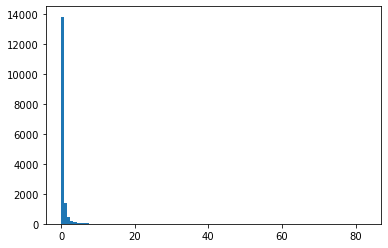

In [10]:
from matplotlib import pyplot as plt

n, bin, patches = plt.hist(df['Global_Sales'], bins=100)
plt.show()

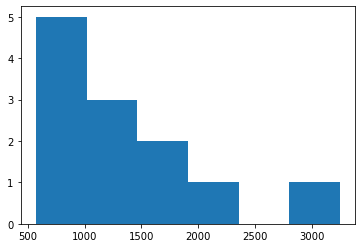

In [11]:
n, bin, patches = plt.hist(df_genre['Genre'], bins=6)
plt.show()

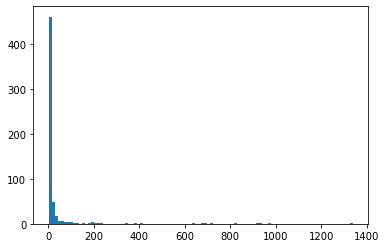

In [12]:
n, bin, patches = plt.hist(df_pub['Publisher'], bins=100)
plt.show()

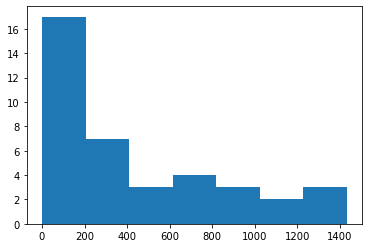

In [13]:
n, bin, patches = plt.hist(df_years['Year'], bins=7)
plt.show()

***Вывод:*** Исходя из приведенных выше графиков, можно сделать вывод,что представленные данные имеют преимущественно распределение Паретто.

## Проверка зависимостей и гипотез

In [14]:
df['Platform'].value_counts()

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [15]:
df['Genre'].value_counts()

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

In [16]:
dict(df['Publisher'].value_counts())

{'Electronic Arts': 1339,
 'Activision': 966,
 'Namco Bandai Games': 928,
 'Ubisoft': 918,
 'Konami Digital Entertainment': 823,
 'THQ': 712,
 'Nintendo': 696,
 'Sony Computer Entertainment': 682,
 'Sega': 632,
 'Take-Two Interactive': 412,
 'Capcom': 376,
 'Atari': 347,
 'Tecmo Koei': 338,
 'Square Enix': 231,
 'Warner Bros. Interactive Entertainment': 217,
 'Disney Interactive Studios': 214,
 'Eidos Interactive': 196,
 'Midway Games': 196,
 '505 Games': 192,
 'Microsoft Game Studios': 189,
 'Acclaim Entertainment': 184,
 'D3Publisher': 183,
 'Vivendi Games': 161,
 'Codemasters': 150,
 'Idea Factory': 128,
 'Deep Silver': 121,
 'Zoo Digital Publishing': 104,
 'Nippon Ichi Software': 104,
 'Unknown': 100,
 'Majesco Entertainment': 90,
 'LucasArts': 89,
 'Rising Star Games': 85,
 'Hudson Soft': 81,
 'Banpresto': 73,
 'Crave Entertainment': 71,
 'Bethesda Softworks': 69,
 'Atlus': 67,
 'Virgin Interactive': 62,
 'Infogrames': 61,
 '5pb': 61,
 'Ignition Entertainment': 59,
 'Marvelous Int

In [17]:
df.groupby('Publisher').sum().sort_values('Global_Sales',ascending=False).head(50)

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,,
Nintendo,1394666.0,815.75,418.30,454.99,95.19,1784.43
Electronic Arts,2686562.0,584.22,367.38,13.98,127.63,1093.39
Activision,1938979.0,426.01,213.72,6.54,74.79,721.41
Sony Computer Entertainment,1367034.0,265.22,187.55,74.10,80.40,607.28
Ubisoft,1843194.0,252.81,163.03,7.33,50.16,473.54
Take-Two Interactive,827344.0,220.47,117.95,5.83,55.20,399.30
THQ,1428311.0,208.60,94.60,5.01,32.11,340.44
Konami Digital Entertainment,1650392.0,88.91,68.62,90.93,29.91,278.56
Sega,1267395.0,108.78,81.41,56.19,24.30,270.70


In [18]:
to_pie = dict(df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False))
to_pie

{'Nintendo': 1784.4299999999982,
 'Electronic Arts': 1093.389999999996,
 'Activision': 721.4099999999981,
 'Sony Computer Entertainment': 607.2799999999988,
 'Ubisoft': 473.53999999999934,
 'Take-Two Interactive': 399.2999999999996,
 'THQ': 340.43999999999943,
 'Konami Digital Entertainment': 278.559999999998,
 'Sega': 270.69999999999925,
 'Namco Bandai Games': 253.65000000000083,
 'Microsoft Game Studios': 245.79000000000005,
 'Capcom': 199.95000000000002,
 'Atari': 146.77000000000027,
 'Square Enix': 144.73000000000027,
 'Warner Bros. Interactive Entertainment': 142.34000000000015,
 'Disney Interactive Studios': 118.76000000000003,
 'Eidos Interactive': 96.74999999999996,
 'LucasArts': 84.95000000000002,
 'Bethesda Softworks': 81.53000000000003,
 'Midway Games': 69.28999999999994,
 'Acclaim Entertainment': 64.13999999999997,
 'SquareSoft': 57.65,
 'Vivendi Games': 56.93000000000002,
 '505 Games': 55.91000000000003,
 'Tecmo Koei': 53.55000000000003,
 'Codemasters': 47.770000000000024,

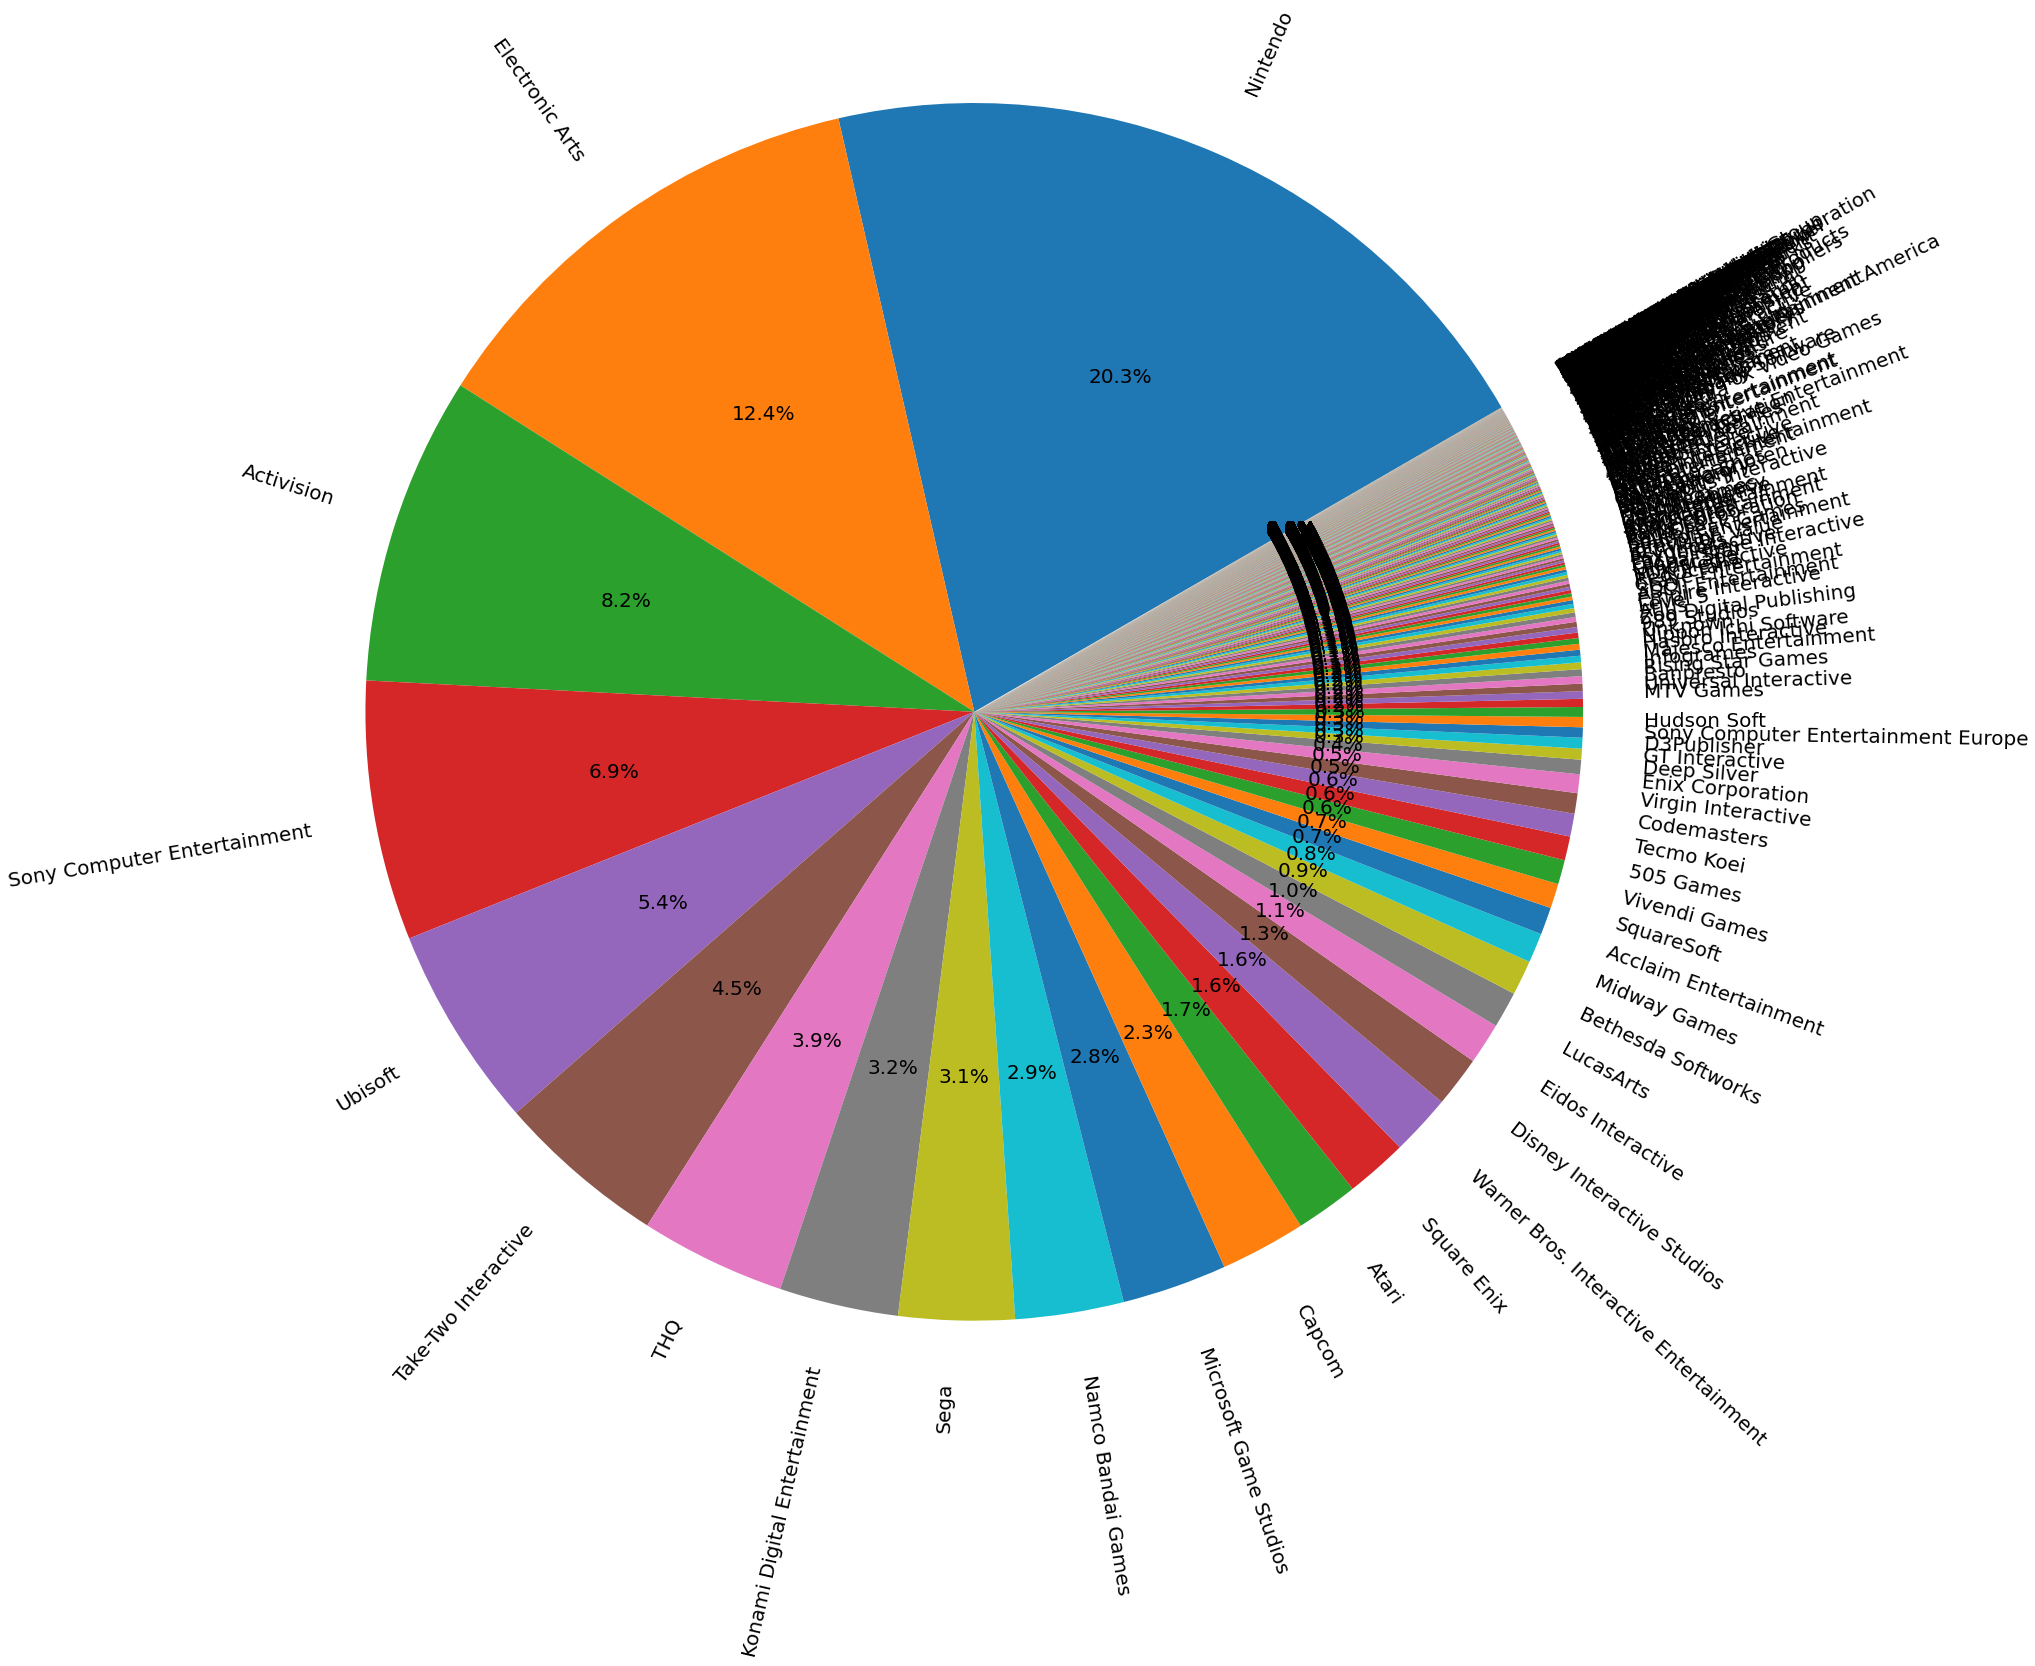

In [19]:
from matplotlib import cm
import matplotlib.colors as clrs

fig1, ax = plt.subplots()
ax.pie(to_pie.values(), labels=to_pie.keys(), startangle=30, radius=7,\
        rotatelabels=True, autopct='%1.1f%%', textprops=dict(color="black", size=20))

plt.show()

Исходя из обилия производителей, отберем только самых внушительных на рынке индустрии. Компании, объем мировых продаж который составляет 1% и более составляют 84.2% рынка. Это:

Nintendo - JP,
Electronic Arts - US ,
Activision - US,
Sony Computer Entertainment - JP,
Ubisoft - Fr ,
Take-Two Interactive - US,
THQ - US ,
Konami Digital Entertainment - JP,
Sega - JP,
Namco Bandai Games - JP,
Microsoft Game Studios - US ,
Capcom - JP,
Atari - JP,
Square Enix - JP,
Warner Bros. Interactive Entertainment - US,
Disney Interactive Studios - US,
Eidos Interactive - UK,
LucasArts - US.

### Проверка зависимостей

Проверить есть ли зависимость продаж по регионам и глобальных от года выпуска, производителя, жанров.

In [20]:
df_years.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 39 entries, 1980.0 to 2020.0
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NA_Sales      39 non-null     float64
 1   EU_Sales      39 non-null     float64
 2   JP_Sales      39 non-null     float64
 3   Other_Sales   39 non-null     float64
 4   Global_Sales  39 non-null     float64
 5   Year          39 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 2.1 KB


In [21]:
df_genre.reset_index(inplace=True)

dict(df['Genre'].value_counts())

{'Action': 3251,
 'Sports': 2304,
 'Misc': 1686,
 'Role-Playing': 1470,
 'Shooter': 1282,
 'Adventure': 1274,
 'Racing': 1225,
 'Platform': 875,
 'Simulation': 848,
 'Fighting': 836,
 'Strategy': 670,
 'Puzzle': 570}

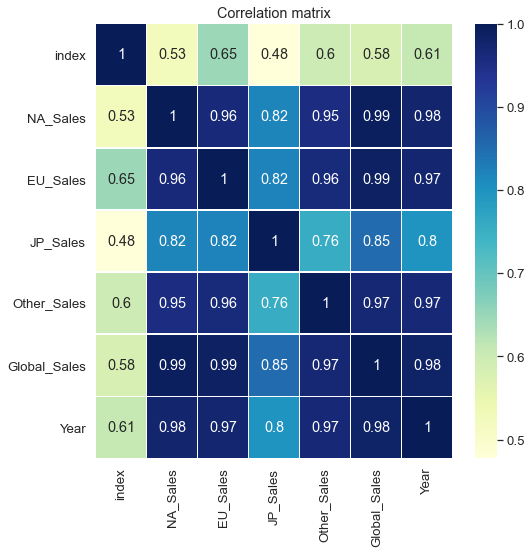

In [22]:
import seaborn as sns

region_dict = {'Action': 1,
 'Sports': 2,
 'Misc': 3,
 'Role-Playing': 4,
 'Shooter': 5,
 'Adventure': 6,
 'Racing': 7,
 'Platform': 8,
 'Simulation': 9,
 'Fighting': 10,
 'Strategy': 11,
 'Puzzle': 12}
df_genre['index'] = df_genre['index'].apply(lambda x: region_dict[x])

plt.figure(figsize = (8,8))

sns.set(font_scale=1.2)
sns.heatmap(df_years.reset_index().corr(), 
            annot=True, linewidths=.5, cmap='YlGnBu')

plt.title('Correlation matrix');

***Вывод:*** В среднем год издания влияет как на продажи, так и на количество игр положительно ( прямая связь 0.575 в среднем)

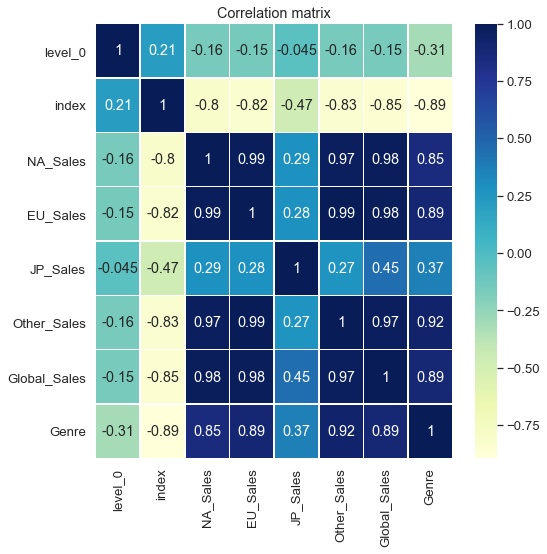

In [23]:
plt.figure(figsize = (8,8))

sns.set(font_scale=1.2)
sns.heatmap(df_genre.reset_index().corr(), 
            annot=True, linewidths=.5, cmap='YlGnBu')

plt.title('Correlation matrix');

***Вывод:*** Жанр влияет на продажи с отрицательной связью, как на продажи, так и на количество игр. (-0.838 на все продажи и количества, кроме Японии). Обратная связь жанра и продаж в Японии значительно меньше, чем в остальных случаях и составляет -0,47.

In [24]:
# 1 - Japan, 0 - other
publisher_country = {'Nintendo': 1,
 'Electronic Arts': 0,
 'Activision': 0,
 'Sony Computer Entertainment': 1,
 'Ubisoft': 0,
 'Take-Two Interactive': 0,
 'THQ': 0,
 'Konami Digital Entertainment': 1,
 'Sega': 1,
 'Namco Bandai Games': 1,
 'Microsoft Game Studios': 0,
 'Capcom': 1,
 'Atari': 1,
 'Square Enix': 1,
 'Warner Bros. Interactive Entertainment': 0,
 'Disney Interactive Studios': 0,
 'Eidos Interactive': 1,
 'LucasArts': 0}

pub_list = ['Nintendo','Electronic Arts',
 'Activision',
 'Sony Computer Entertainment',
 'Ubisoft',
 'Take-Two Interactive',
 'THQ',
 'Konami Digital Entertainment',
 'Sega',
 'Namco Bandai Games',
 'Microsoft Game Studios',
 'Capcom',
 'Atari',
 'Square Enix',
 'Warner Bros. Interactive Entertainment',
 'Disney Interactive Studios',
 'Eidos Interactive',
 'LucasArts']

df_pub.reset_index(inplace=True)
df_pub

,index,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Publisher
0,10TACLE Studios,0.07,0.04,0.00,0.00,0.11,3
1,1C Company,0.01,0.07,0.00,0.02,0.10,3
2,20th Century Fox Video Games,1.82,0.10,0.00,0.01,1.94,5
3,2D Boy,0.00,0.03,0.00,0.01,0.04,1
4,3DO,6.48,3.04,0.00,0.63,10.12,36
...,...,...,...,...,...,...,...
571,id Software,0.02,0.00,0.00,0.00,0.03,1
572,imageepoch Inc.,0.00,0.00,0.04,0.00,0.04,2
573,inXile Entertainment,0.02,0.06,0.00,0.01,0.10,1
574,"mixi, Inc",0.00,0.00,0.86,0.00,0.86,1


In [25]:
df_pub = df_pub[df_pub['index'].isin(pub_list)]
df_pub['index'] = df_pub['index'].apply(lambda x: publisher_country[x])
df_pub

<ipython-input-25-2ed9f28e3712>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pub['index'] = df_pub['index'].apply(lambda x: publisher_country[x])


,index,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Publisher
21,0,426.01,213.72,6.54,74.79,721.41,966
53,1,101.23,25.80,10.70,8.73,146.77,347
85,1,78.45,39.16,67.38,14.82,199.95,376
126,0,70.44,34.36,0.56,13.15,118.76,214
137,1,47.85,34.85,6.11,7.90,96.75,196
138,0,584.22,367.38,13.98,127.63,1093.39,1339
275,1,88.91,68.62,90.93,29.91,278.56,823
288,0,48.43,26.00,0.20,10.28,84.95,89
323,0,155.35,68.61,3.26,18.56,245.79,189
347,1,69.38,42.61,126.84,14.64,253.65,928


In [26]:
df_jp = df_pub.loc[df_pub['index'] == 1]
df_jp.describe()

,index,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Publisher
count,9.0,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,1.0,180.462222,103.430000,104.114444,32.192222,420.313333,545.666667
std,0.0,247.056263,128.207052,136.763139,32.495138,532.687877,264.874971
min,1.0,47.850000,25.800000,6.110000,7.900000,96.750000,196.000000
25%,1.0,69.380000,34.850000,49.790000,13.840000,146.770000,347.000000
50%,1.0,88.910000,42.610000,67.380000,14.820000,253.650000,632.000000
75%,1.0,108.780000,81.410000,90.930000,29.910000,278.560000,696.000000
max,1.0,815.750000,418.300000,454.990000,95.190000,1784.430000,928.000000


In [27]:
df_other = df_pub.loc[df_pub['index'] == 0]
df_other.describe()

,index,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Publisher
count,9.0,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,0.0,226.852222,126.053333,4.860000,44.335556,402.213333,561.777778
std,0.0,177.760733,109.560355,4.337274,38.247809,328.163040,438.985700
min,0.0,48.430000,26.000000,0.200000,10.280000,84.950000,89.000000
25%,0.0,75.340000,48.830000,1.030000,17.140000,142.340000,214.000000
50%,0.0,208.600000,94.600000,5.010000,32.110000,340.440000,412.000000
75%,0.0,252.810000,163.030000,6.540000,55.200000,473.540000,918.000000
max,0.0,584.220000,367.380000,13.980000,127.630000,1093.390000,1339.000000


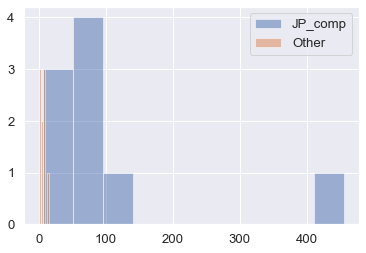

In [28]:
plt.hist(df_jp['JP_Sales'], bins=10, alpha=0.5, label='JP_comp')
plt.hist(df_other['JP_Sales'], bins=5, alpha=0.5, label='Other')
plt.legend(loc='upper right')
plt.show()

Дальнейший анализ нецелесообразен, т.к. на графиках видно, что продажи японских компаний на японских рынках значительно преобладают в количестве.

In [29]:
df_act = df.loc[df['Genre'] == 'Action']
df_act.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,3251.000000,3251.000000,3251.000000,3251.000000,3251.000000,3251.000000
mean,2007.906183,0.265078,0.158868,0.048800,0.056881,0.529942
std,6.072900,0.570492,0.410612,0.165982,0.241966,1.165238
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2005.000000,0.020000,0.000000,0.000000,0.000000,0.070000
50%,2009.000000,0.100000,0.030000,0.000000,0.010000,0.190000
75%,2012.000000,0.260000,0.150000,0.030000,0.050000,0.500000
max,2017.000000,9.630000,9.270000,3.960000,10.570000,21.400000


In [30]:
df_sport = df.loc[df['Genre'] == 'Sports']
df_sport.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000
mean,2005.477865,0.290838,0.161172,0.058490,0.057574,0.568247
std,5.633659,1.046706,0.782244,0.225504,0.245473,2.104926
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2002.000000,0.020000,0.000000,0.000000,0.000000,0.090000
50%,2006.000000,0.110000,0.020000,0.000000,0.010000,0.220000
75%,2009.000000,0.300000,0.110000,0.010000,0.040000,0.560000
max,2016.000000,41.490000,29.020000,3.770000,8.460000,82.740000


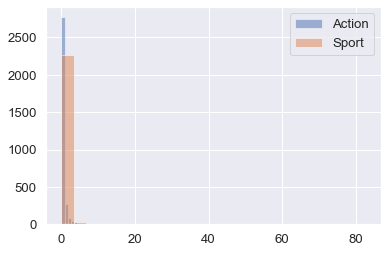

In [31]:
plt.hist(df_act['Global_Sales'], bins=25, alpha=0.5, label='Action')
plt.hist(df_sport['Global_Sales'], bins=25, alpha=0.5, label='Sport')
plt.legend(loc='upper right')
plt.show()

При сравнении показателей и графиков, можно сделать вывод, что, несмотря на большее количество игр в жанре Action и приблизительно одинаковое среднее значение (0.529942 и 0.568247), игры в жанре спорт являются более популярными (Разница в среднеквадратичном значении, и максимальные мировые продажи спортивных в 4 раза превышают максимум Action). 